## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [2]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE= 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [9]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_accuracy",
                         patience=10,
                         verbose=1)
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

49/49 [==============================] - 3s 51ms/step - loss: 1.0815 - accuracy: 0.6297 - val_loss: 1.4696 - val_accuracy: 0.4866
Epoch 20/50
49/49 [==============================] - 2s 49ms/step - loss: 1.0589 - accuracy: 0.6376 - val_loss: 1.4681 - val_accuracy: 0.4922
Epoch 21/50
49/49 [==============================] - 3s 53ms/step - loss: 1.0378 - accuracy: 0.6461 - val_loss: 1.4718 - val_accuracy: 0.4949
Epoch 22/50
49/49 [==============================] - 2s 50ms/step - loss: 1.0153 - accuracy: 0.6556 - val_loss: 1.4671 - val_accuracy: 0.4930
Epoch 23/50
49/49 [==============================] - 3s 55ms/step - loss: 0.9925 - accuracy: 0.6649 - val_loss: 1.4711 - val_accuracy: 0.4961
Epoch 24/50
49/49 [==============================] - 3s 53ms/step - loss: 0.9721 - accuracy: 0.6745 - val_loss: 1.4796 - val_accuracy: 0.4909
Epoch 25/50
49/49 [==============================] - 2s 50ms/step - loss: 0.9486 - accuracy: 0.6805 - val_loss: 1.4772 - val_accuracy: 0.4965
Epoch 26/50
49/49 

Epoch 41/50
49/49 [==============================] - 3s 51ms/step - loss: 0.6364 - accuracy: 0.8076 - val_loss: 1.5977 - val_accuracy: 0.4917
Epoch 42/50
49/49 [==============================] - 2s 50ms/step - loss: 0.6209 - accuracy: 0.8123 - val_loss: 1.6088 - val_accuracy: 0.4913
Epoch 43/50
49/49 [==============================] - 2s 50ms/step - loss: 0.6015 - accuracy: 0.8191 - val_loss: 1.6216 - val_accuracy: 0.4925
Epoch 44/50
49/49 [==============================] - 2s 50ms/step - loss: 0.5837 - accuracy: 0.8261 - val_loss: 1.6131 - val_accuracy: 0.4881
Epoch 45/50
49/49 [==============================] - 2s 50ms/step - loss: 0.5652 - accuracy: 0.8339 - val_loss: 1.6314 - val_accuracy: 0.4884
Epoch 46/50
49/49 [==============================] - 2s 51ms/step - loss: 0.5488 - accuracy: 0.8407 - val_loss: 1.6523 - val_accuracy: 0.4896
Epoch 47/50
49/49 [==============================] - 2s 48ms/step - loss: 0.5313 - accuracy: 0.8465 - val_loss: 1.6674 - val_accuracy: 0.4818
Epoch 

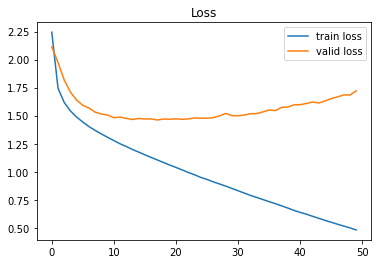

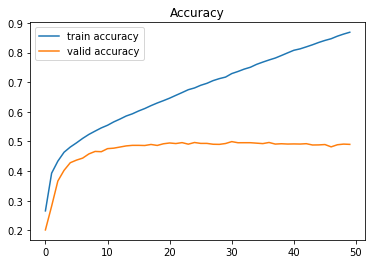

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


In [11]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=25, 
                          verbose=1
                          )
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)              

Epoch 49/50
49/49 [==============================] - 3s 52ms/step - loss: 0.5049 - accuracy: 0.8581 - val_loss: 1.6880 - val_accuracy: 0.4892
Epoch 50/50
49/49 [==============================] - 3s 57ms/step - loss: 0.4865 - accuracy: 0.8645 - val_loss: 1.6722 - val_accuracy: 0.4937


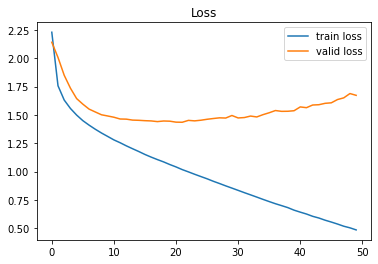

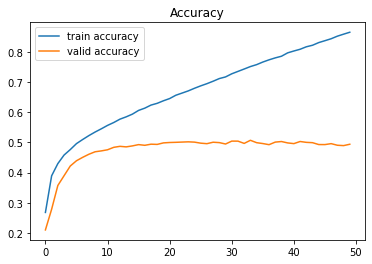

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()